In [1]:
import torch
from matplotlib import pyplot as plt

In [2]:
def get_q_weights(model):
    weights = []
    for idx in range(6):
        weights.append(model.transformer.layers[idx][0].fn.to_qkv.weight[:512].flatten())
    return torch.cat(weights)

def get_k_weights(model):
    weights = []
    for idx in range(6):
        weights.append(model.transformer.layers[idx][0].fn.to_qkv.weight[512:1024].flatten())
    return torch.cat(weights)

def get_v_weights(model):
    weights = []
    for idx in range(6):
        weights.append(model.transformer.layers[idx][0].fn.to_qkv.weight[1024:].flatten())
    return torch.cat(weights)

# CIFAR-10

In [3]:
x = {}
x[1.1] = torch.load("out_1.1_cosine_cifar10.pth", weights_only=False, map_location='cpu')
x[1.75] = torch.load("out_1.75_cosine_cifar10.pth", weights_only=False, map_location='cpu')
x[2] = torch.load("out_2_cosine_cifar10.pth", weights_only=False, map_location='cpu')
x[3] = torch.load("out_3_cosine_cifar10.pth", weights_only=False, map_location=torch.device('cpu'))
x["adam"] = torch.load("out_Adam_cosine_cifar10.pth", weights_only=False, map_location='cpu')

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_1769/2612881560.py:1: SyntaxWarning: invalid escape sequence '\e'
  for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), (3, "$\ell_3$-MD"), ("adam", "Adam")]:
/tmp/ipykernel_1769/2612881560.py:1: SyntaxWarning: invalid escape sequence '\e'
  for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), (3, "$\ell_3$-MD"), ("adam", "Adam")]:
/tmp/ipykernel_1769/2612881560.py:1: SyntaxWarning: invalid escape sequence '\e'
  for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), 

1.1 0.8241
1.75 0.8192
2 0.8232
3 0.8248
adam 0.8263


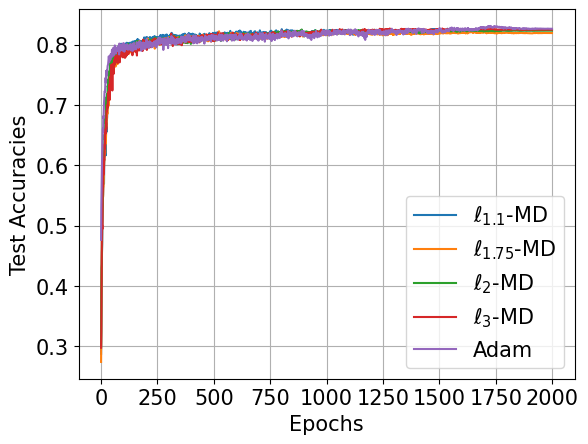

In [4]:
for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), (3, "$\ell_3$-MD"), ("adam", "Adam")]:
    print(p, x[p]["test_accuracies"][-1])
    plt.plot(x[p]["test_accuracies"], label=label)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Test Accuracies", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.savefig("vit_cifar10_test_accuracy.jpg", bbox_inches="tight")

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_1769/3773260923.py:1: SyntaxWarning: invalid escape sequence '\e'
  for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), (3, "$\ell_3$-MD"), ("adam", "Adam")]:
/tmp/ipykernel_1769/3773260923.py:1: SyntaxWarning: invalid escape sequence '\e'
  for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), (3, "$\ell_3$-MD"), ("adam", "Adam")]:
/tmp/ipykernel_1769/3773260923.py:1: SyntaxWarning: invalid escape sequence '\e'
  for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), 

1.1 29.795180832280053
1.75 29.87677090022299
2 29.27631274726656
3 29.70452706740962
adam 29.458612019485898


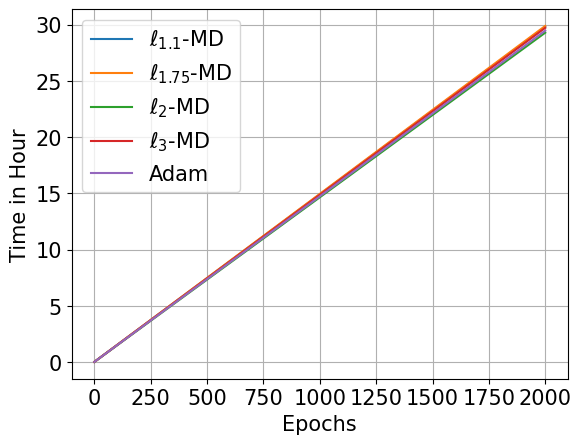

In [5]:
for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), (3, "$\ell_3$-MD"), ("adam", "Adam")]:
    print(p, sum(x[p]["time_taken"]) / 3600)
    plt.plot(torch.cumsum(torch.tensor(x[p]["time_taken"]), dim=0) / 3600, label=label)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Time in Hour", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.savefig("vit_cifar10_time_taken.jpg", bbox_inches="tight")

tensor(0.3090, grad_fn=<MaxBackward1>)


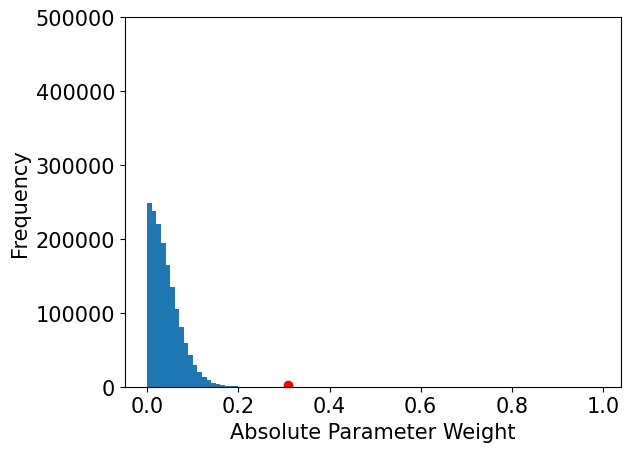

In [6]:
weights = get_k_weights(x["adam"]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar10_adam_wk_weights.jpg", bbox_inches="tight")

tensor(0.2686, grad_fn=<MaxBackward1>)


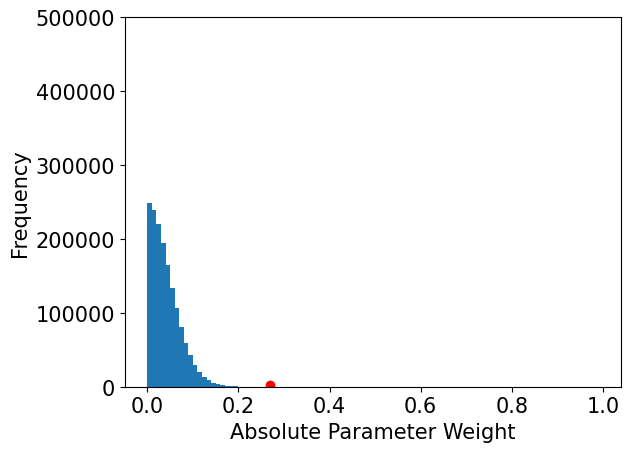

In [7]:
weights = get_q_weights(x["adam"]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar10_adam_wq_weights.jpg", bbox_inches="tight")

tensor(0.3232, grad_fn=<MaxBackward1>)


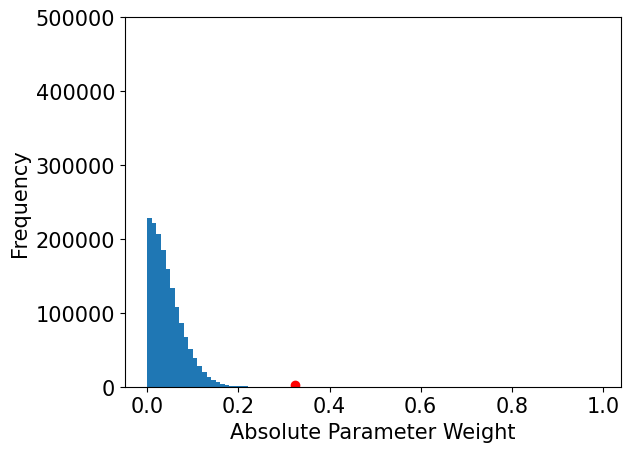

In [8]:
weights = get_v_weights(x["adam"]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar10_adam_wv_weights.jpg", bbox_inches="tight")

tensor(0.4092, grad_fn=<MaxBackward1>)


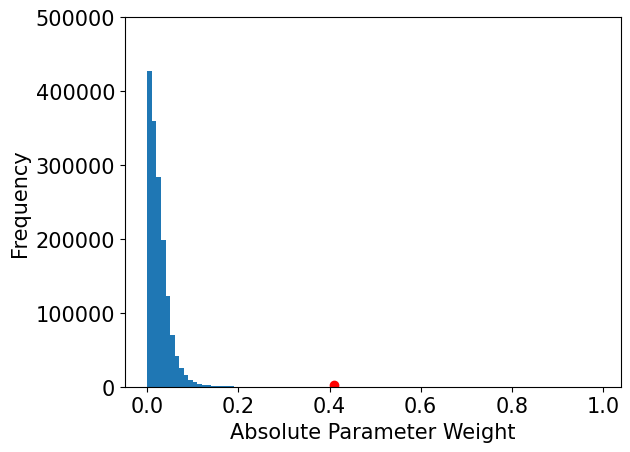

In [9]:
weights = get_k_weights(x[1.1]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar10_l1.1_wk_weights.jpg", bbox_inches="tight")

tensor(0.4184, grad_fn=<MaxBackward1>)


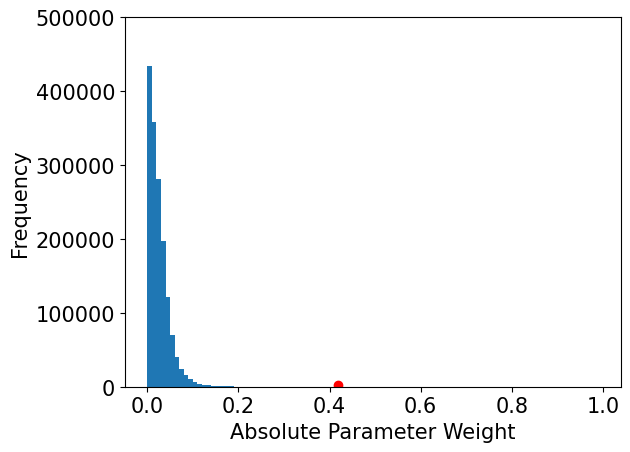

In [10]:
weights = get_q_weights(x[1.1]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar10_l1.1_wq_weights.jpg", bbox_inches="tight")

tensor(0.8750, grad_fn=<MaxBackward1>)


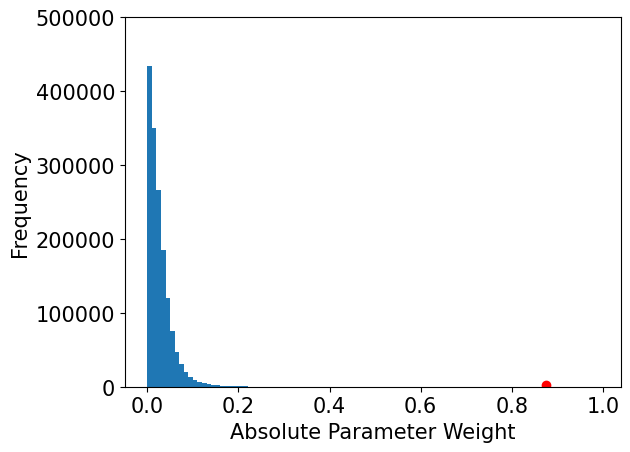

In [11]:
weights = get_v_weights(x[1.1]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar10_l1.1_wv_weights.jpg", bbox_inches="tight")

tensor(0.2268, grad_fn=<MaxBackward1>)


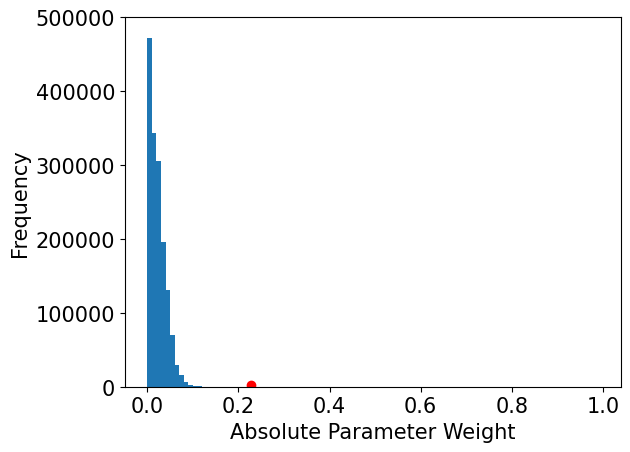

In [12]:
weights = get_k_weights(x[1.75]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar10_l1.75_wk_weights.jpg", bbox_inches="tight")

tensor(0.2046, grad_fn=<MaxBackward1>)


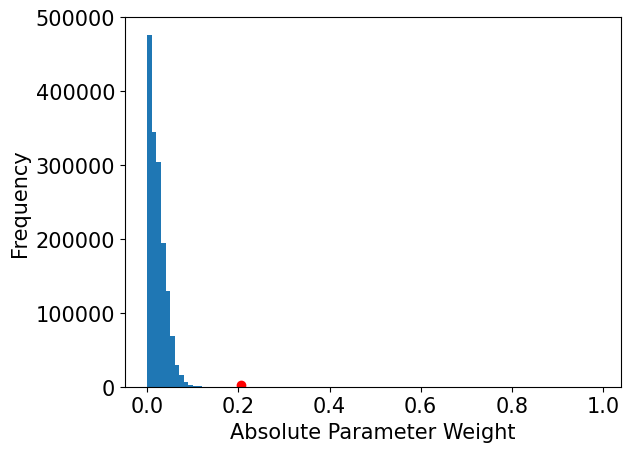

In [13]:
weights = get_q_weights(x[1.75]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar10_l1.75_wq_weights.jpg", bbox_inches="tight")

tensor(0.2097, grad_fn=<MaxBackward1>)


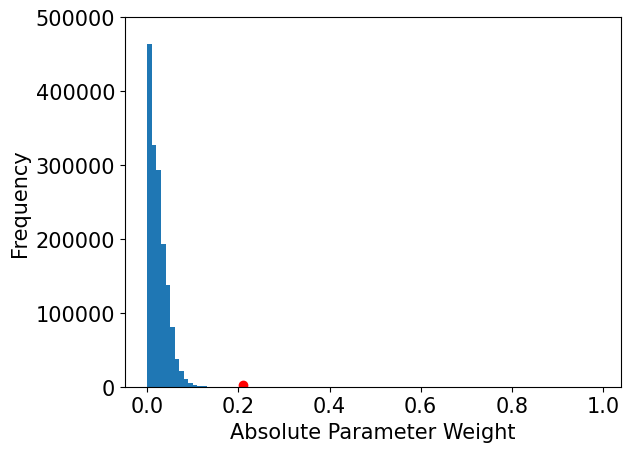

In [14]:
weights = get_v_weights(x[1.75]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar10_l1.75_wv_weights.jpg", bbox_inches="tight")

tensor(0.2097, grad_fn=<MaxBackward1>)


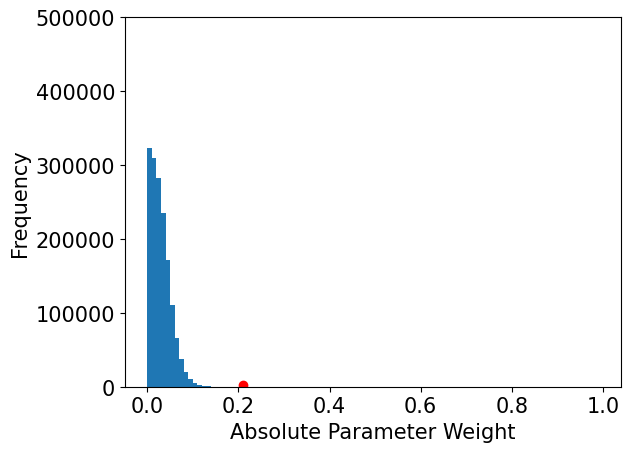

In [15]:
weights = get_k_weights(x[2]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar10_l2_wk_weights.jpg", bbox_inches="tight")

tensor(0.2413, grad_fn=<MaxBackward1>)


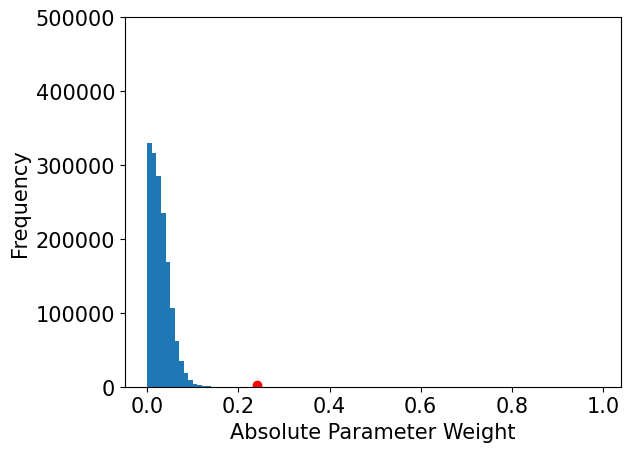

In [16]:
weights = get_q_weights(x[2]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar10_l2_wq_weights.jpg", bbox_inches="tight")

tensor(0.2228, grad_fn=<MaxBackward1>)


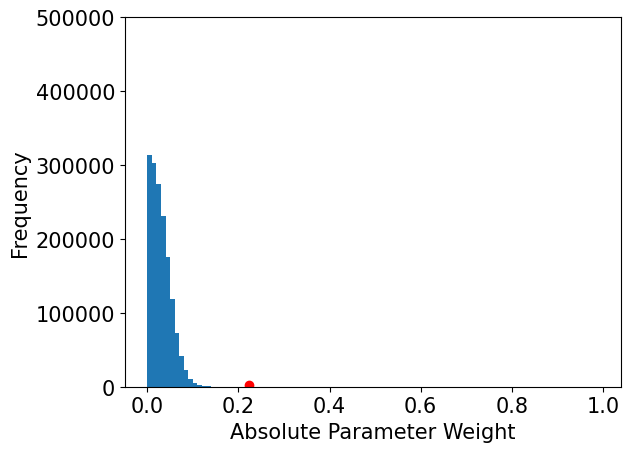

In [17]:
weights = get_v_weights(x[2]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar10_l2_wv_weights.jpg", bbox_inches="tight")

tensor(0.2847, grad_fn=<MaxBackward1>)


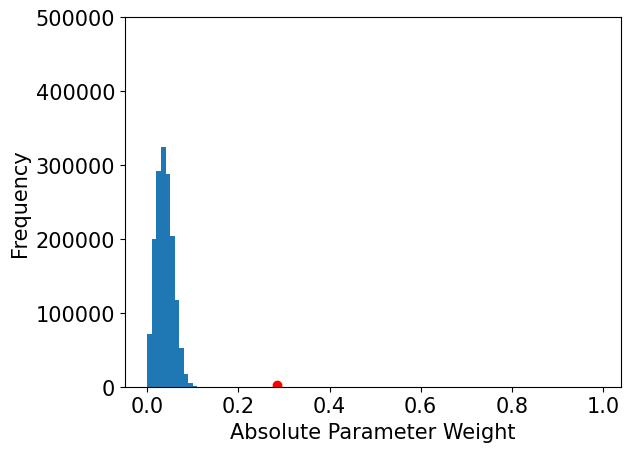

In [18]:
weights = get_k_weights(x[3]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar10_l3_wk_weights.jpg", bbox_inches="tight")

tensor(0.2335, grad_fn=<MaxBackward1>)


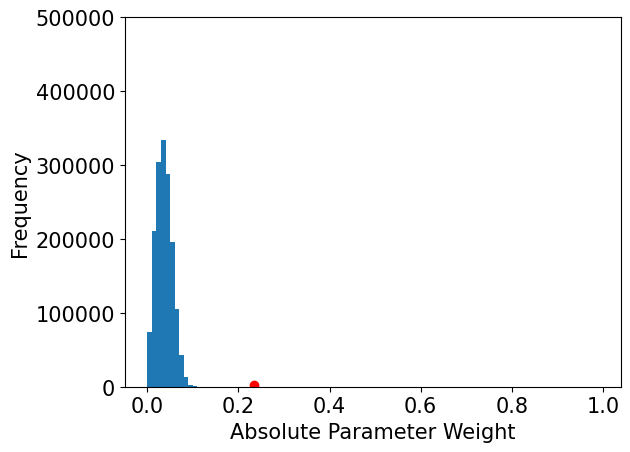

In [19]:
weights = get_q_weights(x[3]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar10_l3_wq_weights.jpg", bbox_inches="tight")

tensor(0.1592, grad_fn=<MaxBackward1>)


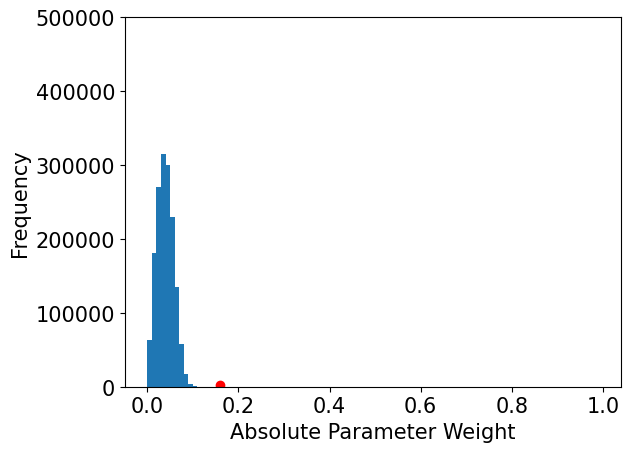

In [20]:
weights = get_v_weights(x[3]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar10_l3_wv_weights.jpg", bbox_inches="tight")

# CIFAR-100

In [21]:
x = {}
x[1.1] = torch.load("out_1.1_cosine_cifar100.pth", weights_only=False, map_location='cpu')
x[1.75] = torch.load("out_1.75_cosine_cifar100.pth", weights_only=False, map_location='cpu')
x[2] = torch.load("out_2_cosine_cifar100.pth", weights_only=False, map_location='cpu')
x[3] = torch.load("out_3_cosine_cifar100.pth", weights_only=False, map_location=torch.device('cpu'))
x["adam"] = torch.load("out_Adam_cosine_cifar100.pth", weights_only=False, map_location='cpu')

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_1769/3334585294.py:1: SyntaxWarning: invalid escape sequence '\e'
  for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), (3, "$\ell_3$-MD"), ("adam", "Adam")]:
/tmp/ipykernel_1769/3334585294.py:1: SyntaxWarning: invalid escape sequence '\e'
  for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), (3, "$\ell_3$-MD"), ("adam", "Adam")]:
/tmp/ipykernel_1769/3334585294.py:1: SyntaxWarning: invalid escape sequence '\e'
  for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), 

1.1 0.5557
1.75 0.5543
2 0.5507
3 0.5525
adam 0.5467


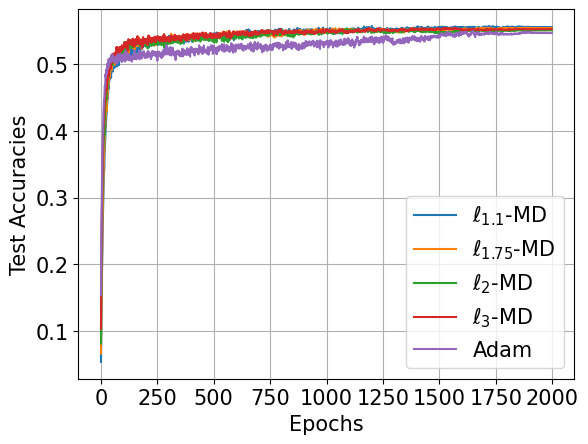

In [22]:
for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), (3, "$\ell_3$-MD"), ("adam", "Adam")]:
    print(p, x[p]["test_accuracies"][-1])
    plt.plot(x[p]["test_accuracies"], label=label)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Test Accuracies", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.savefig("vit_cifar100_test_accuracy.jpg", bbox_inches="tight")

<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
<>:1: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_1769/1688286259.py:1: SyntaxWarning: invalid escape sequence '\e'
  for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), (3, "$\ell_3$-MD"), ("adam", "Adam")]:
/tmp/ipykernel_1769/1688286259.py:1: SyntaxWarning: invalid escape sequence '\e'
  for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), (3, "$\ell_3$-MD"), ("adam", "Adam")]:
/tmp/ipykernel_1769/1688286259.py:1: SyntaxWarning: invalid escape sequence '\e'
  for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), 

1.1 25.27413171483411
1.75 25.372512945201663
2 25.210532524983087
3 25.115835559103225
adam 24.931484582357935


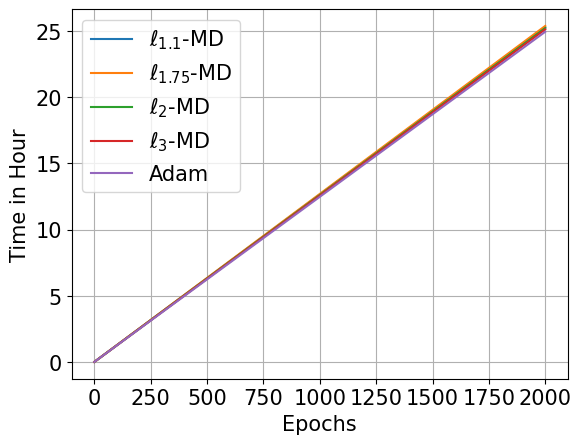

In [23]:
for p, label in [(1.1, "$\ell_{1.1}$-MD"), (1.75, "$\ell_{1.75}$-MD"), (2, "$\ell_2$-MD"), (3, "$\ell_3$-MD"), ("adam", "Adam")]:
    print(p, sum(x[p]["time_taken"]) / 3600)
    plt.plot(torch.cumsum(torch.tensor(x[p]["time_taken"]), dim=0) / 3600, label=label)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Time in Hour", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.grid()
plt.savefig("vit_cifar100_time_taken.jpg", bbox_inches="tight")

tensor(0.3127, grad_fn=<MaxBackward1>)


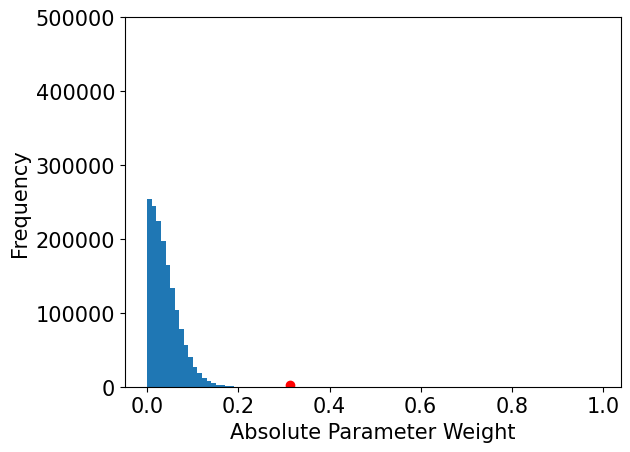

In [24]:
weights = get_k_weights(x["adam"]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar100_adam_wk_weights.jpg", bbox_inches="tight")

tensor(0.3182, grad_fn=<MaxBackward1>)


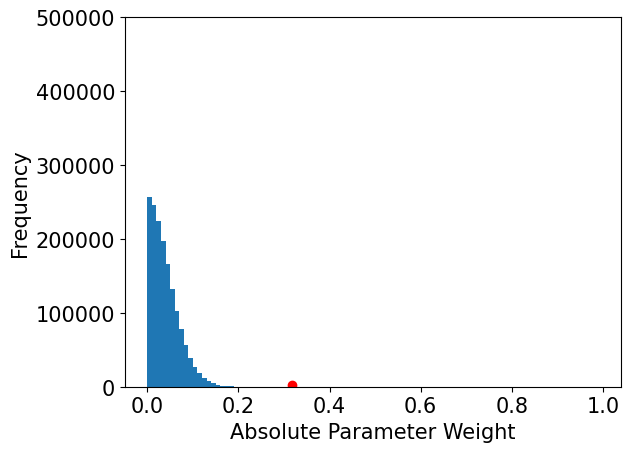

In [25]:
weights = get_q_weights(x["adam"]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar100_adam_wq_weights.jpg", bbox_inches="tight")

tensor(0.3130, grad_fn=<MaxBackward1>)


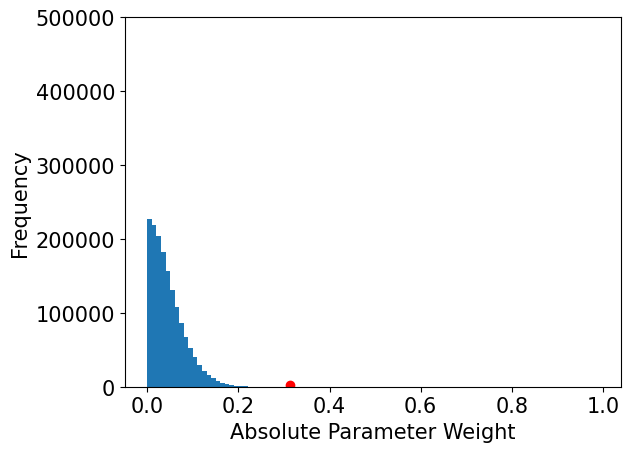

In [26]:
weights = get_v_weights(x["adam"]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar100_adam_wv_weights.jpg", bbox_inches="tight")

tensor(0.8077, grad_fn=<MaxBackward1>)


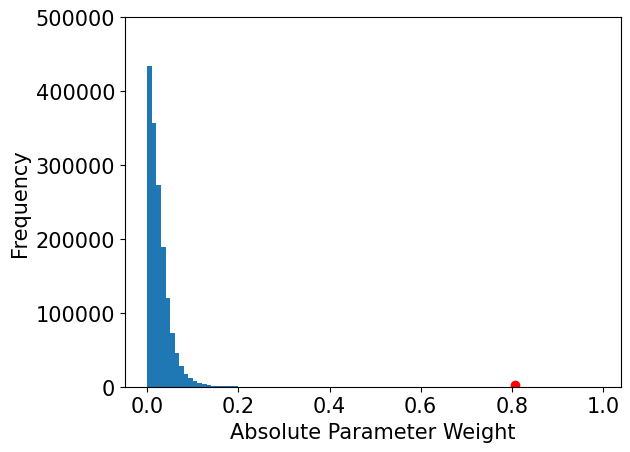

In [27]:
weights = get_k_weights(x[1.1]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar100_l1.1_wk_weights.jpg", bbox_inches="tight")

tensor(0.6148, grad_fn=<MaxBackward1>)


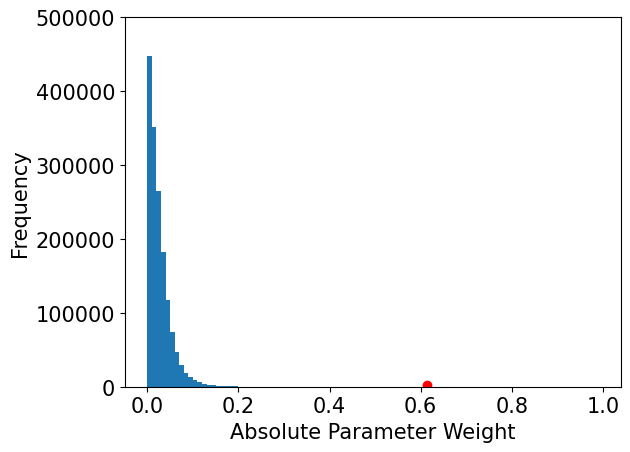

In [28]:
weights = get_q_weights(x[1.1]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar100_l1.1_wq_weights.jpg", bbox_inches="tight")

tensor(0.7063, grad_fn=<MaxBackward1>)


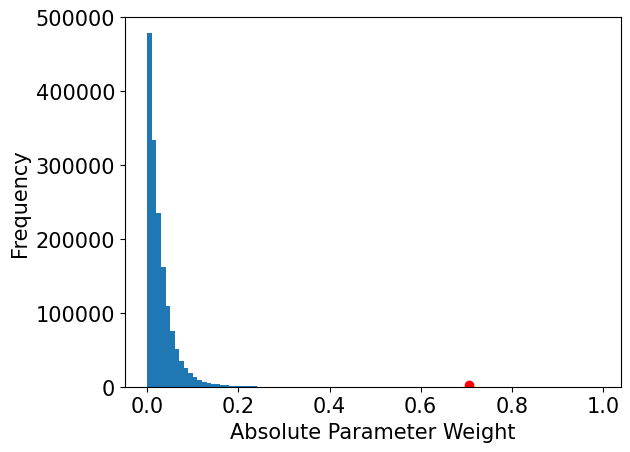

In [29]:
weights = get_v_weights(x[1.1]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar100_l1.1_wv_weights.jpg", bbox_inches="tight")

tensor(0.2016, grad_fn=<MaxBackward1>)


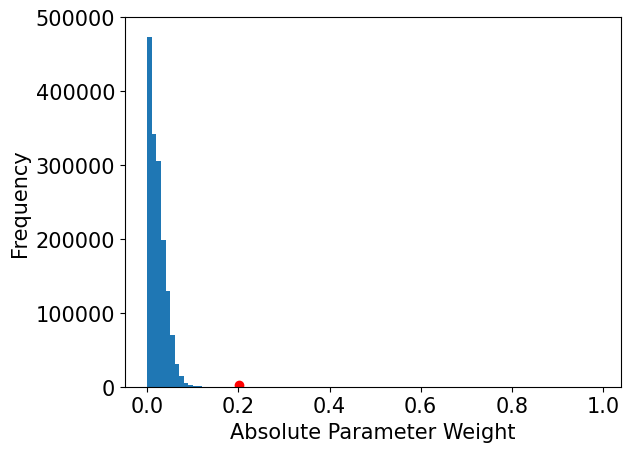

In [30]:
weights = get_k_weights(x[1.75]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar100_l1.75_wk_weights.jpg", bbox_inches="tight")

tensor(0.1970, grad_fn=<MaxBackward1>)


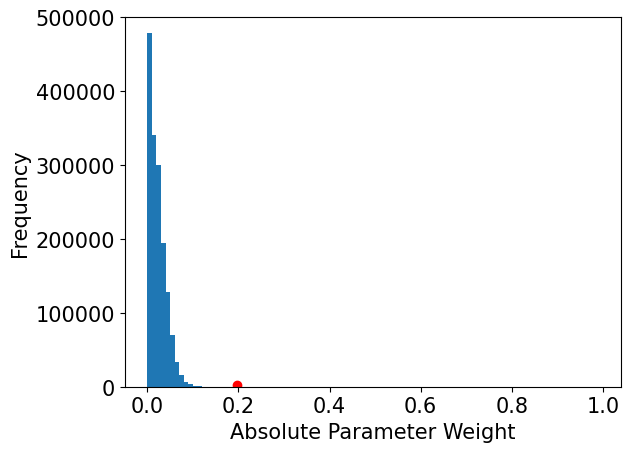

In [31]:
weights = get_q_weights(x[1.75]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar100_l1.75_wq_weights.jpg", bbox_inches="tight")

tensor(0.2136, grad_fn=<MaxBackward1>)


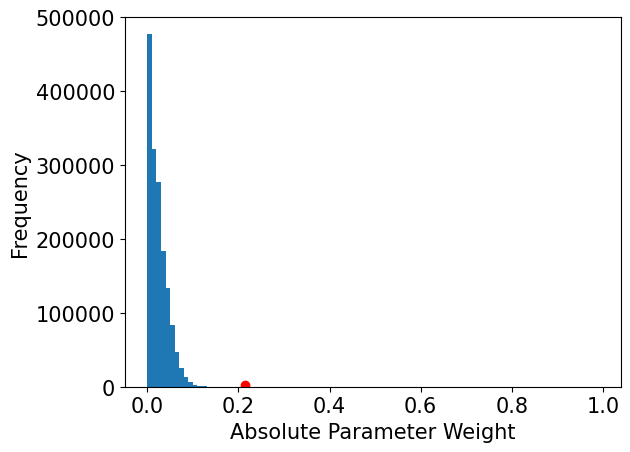

In [32]:
weights = get_v_weights(x[1.75]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar100_l1.75_wv_weights.jpg", bbox_inches="tight")

tensor(0.2077, grad_fn=<MaxBackward1>)


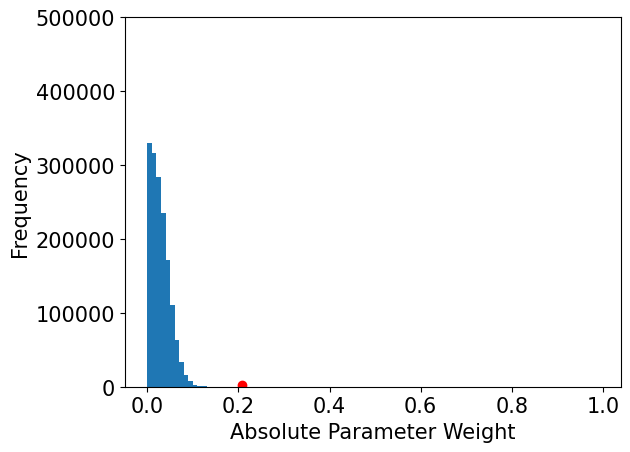

In [33]:
weights = get_k_weights(x[2]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar100_l2_wk_weights.jpg", bbox_inches="tight")

tensor(0.2552, grad_fn=<MaxBackward1>)


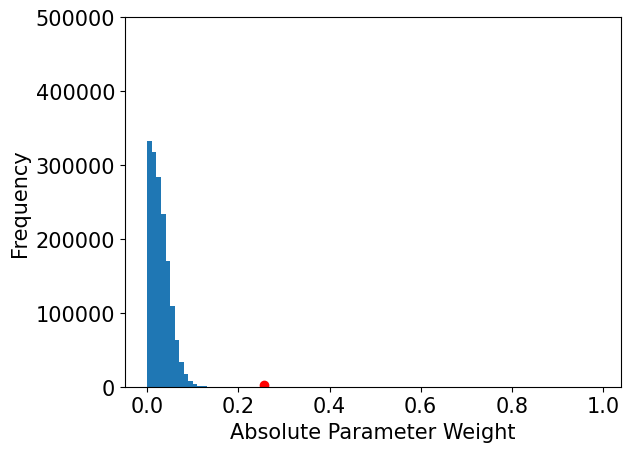

In [34]:
weights = get_q_weights(x[2]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar100_l2_wq_weights.jpg", bbox_inches="tight")

tensor(0.1963, grad_fn=<MaxBackward1>)


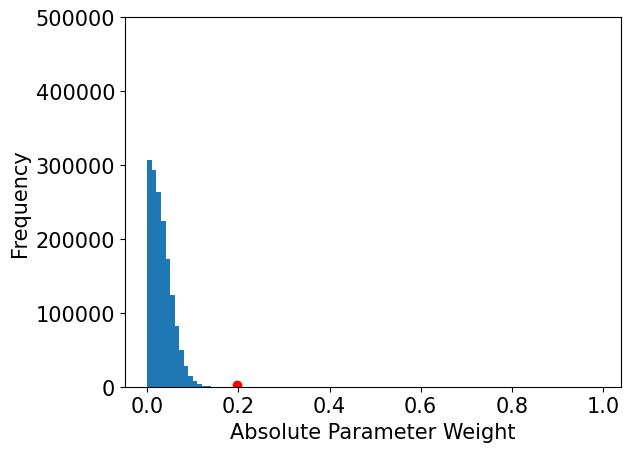

In [35]:
weights = get_v_weights(x[2]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar100_l2_wv_weights.jpg", bbox_inches="tight")

tensor(0.1025, grad_fn=<MaxBackward1>)


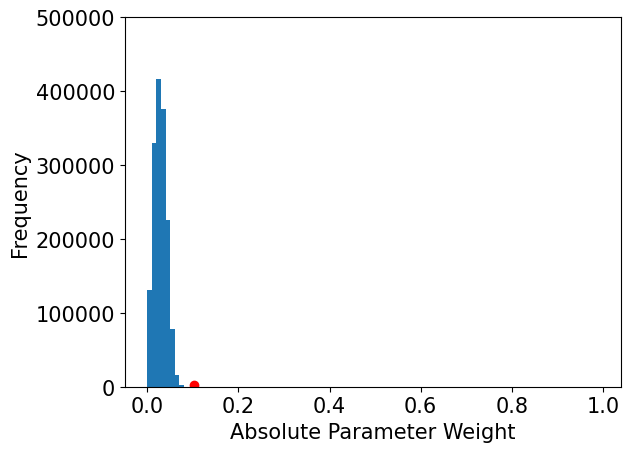

In [36]:
weights = get_k_weights(x[3]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar100_l3_wk_weights.jpg", bbox_inches="tight")

tensor(0.0898, grad_fn=<MaxBackward1>)


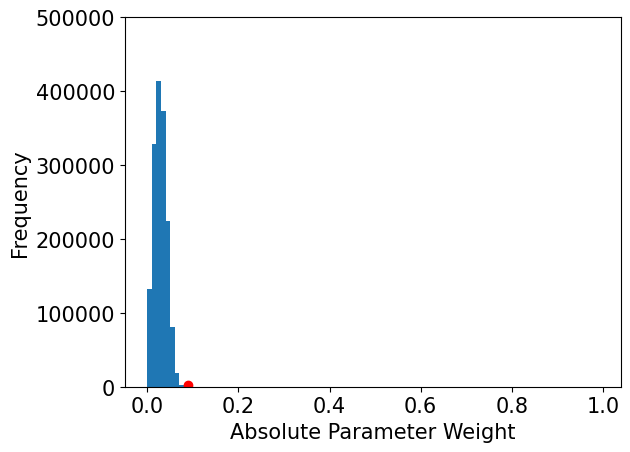

In [37]:
weights = get_q_weights(x[3]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar100_l3_wq_weights.jpg", bbox_inches="tight")

tensor(0.0968, grad_fn=<MaxBackward1>)


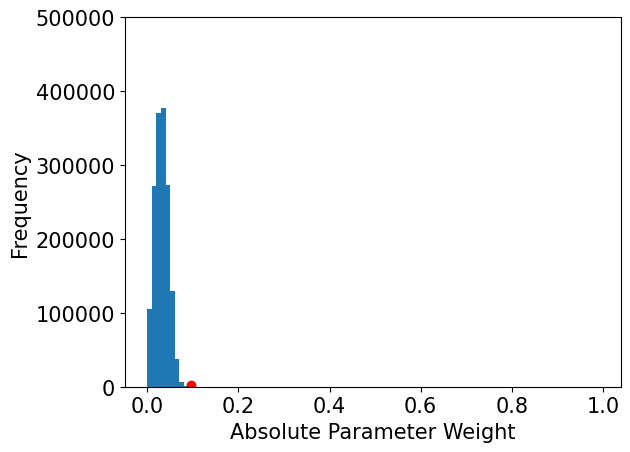

In [38]:
weights = get_v_weights(x[3]["model"])
print(weights.abs().max())
plt.hist(weights.abs().detach().numpy(), bins=torch.tensor([0.50 * idx / 50 for idx in range(100)]))
plt.scatter([weights.abs().max().item()], [3_000], color="red")
plt.xlabel("Absolute Parameter Weight", fontsize=15)
plt.ylabel("Frequency", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylim([0, 500_000])
plt.savefig("vit_cifar100_l3_wv_weights.jpg", bbox_inches="tight")